# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko


---

* [Numpy,Scipy,Scikit-image를 통한 기본 영상 처리2](#Numpy,Scipy,Scikit-image를-통한-기본-영상-처리1) 
     * [ Numpy Review](#Review)
     * [ 영상처리 library](#영상처리-library)
     * [ Numpy 기반 라이브러리 통해서 전처리](#Numpy-기반-라이브러리-통해서-전처리)
         * [데이터 셋 구축](#데이터-셋-구축 )
         * [1.Numpy 기반 이미지 불러오기](#1.Numpy-기반-이미지-불러오기)
            * 1.1[ matplotlib  ](#1.1-matplotlib )
                * [numpy format 이미지로 보여주기 ](#numpy-format-이미지로-보여주기)
            * 1.2[ imageio  ](#1.2-imageio )
            * 1.3[ skimage  ](#1.3-skimage )
         * [2.데이터 크기 맞추기](#2.데이터-크기-맞추기)
            * [2.1 slicing  ](#2.1-slicing )
            * [2.2 resize  ](#2.2-resize )
            * [2.3 skimage의 crop  ](#2.3-crop )
            * [base : 메모리 공유 확인](#base)
            * [copy : 새 메모리에 할당](#copy)
         * [3.데이터 합치기](#3.데이터-합치기)
            * [결합 기준 ](#결합-기준 )
            * [3.1 concatenate](#3.1-concatenate)     
            * [stack  ](#stack )
         * [Dataset](#Dataset)

           
---
## Numpy,Scipy,Scikit-image, PIL를 통한 기본 영상 처리2
- Numpy 기반의 라이브러리를 통해서 전처리
- 영상데이터를 Numpy format인 ndarray로 불러와야함

### Review

1. 영상처리, 딥러닝에 자주 쓰이는 python programming 복습
2.  영상처리에서 Numpy를 전처리를 어떻게, 어디 쓰는지
    - Pil,scikit-image에 초점을 둘것임
    - Numpy 기반 
    
Numpy가 빠른 이유
1. hardward 활용
2. glue language 특성 이용
3. 효율적인 자료 구조 

- 작은 데이터인경우 순수한 python이 빠르고 Numpy format으로 변환시키기 때문에
     - type casting 할 때 resource가 필요 
- 큰데이터는 numpy 가 빠르고 GPU를 쓰게 되면 tensor 가 빠름

Numpy 단점
1. GPU 지원 안함
2. Mutable 타입 (메모리를 공유하는 , img로 img2로 만들면 img에 무언가 추가를 해도 img2에 반영되어 나오는)
3. 모던하지 못 함


- bitmap iamge는 벡터,행렬로 표현하기 때문에 파이썬 자체로만 사용한다면 Numpy

### Scipy
- 필수적인 패키지 형태로 특정 분야에 잘 사용하는것을 모아둔 라이브러리
- 책 Elegant Scipy
- Numpy는 low level이며 Numpy 기반으로 - 각각 engineer 분야에서 많이 사용하는 기능을 만들어 놓음
- numpy 자체에서 필수적인 기능을 제공하지 않고 패키지 형태로 특정 분야의 잘 사용되는 라이브러리르 모아 둔 것
    - numpy를 확장시켜 공학,과학 분야에서 많이 사용하는 것들을 미리 만들어 놓은 것

- [Scipy](https://www.scipy.org/)
- scipy의 ndimage 패키지는 영상 처리 더 쉽게


<br>

- scipy의 ndimage 통해 영상 처리 더 쉽게 가능함
- scipy,numpy는 전문가용 
- scikit 은 더 편리하게 전문가 아니더라도 기능 제공(numpy기반으로 만들어짐)
- scipy에서 영상처리 파트 빠지고 scikit-image으로 옮겨짐
- numpy,scikit,opencv,til 을 해야함



In [1]:
import numpy as np
import scipy

package를 보면 분야별로 모아둠

In [2]:
dir(scipy) #  영상처리 분야 관련 -ndimage

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'LowLevelCallable',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_UFUNC_API',
 '__SCIPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__numpy_version__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_add_newdoc_ufunc',
 '_dep_fft',
 '_deprecated',
 '_d

In [2]:
from scipy import ndimage 
#영상처리 쉽게 할 수 있음- Numpy 사용하지 않고

## 영상처리 library

저수준  numpy -> scipy -> skimage 고수준

1. Numpy
    - 가장 low-level이지만 기본
    - 전문가 대상
    - python, vector 처리 하기 위한 library 로 low level
2. Scipy
    - Numpy에서 기능을 추가
    - Scipy에서 더이상 영상처리 관련 업데이트 안 하고 Scikit-Image로 바뀜
3. Scikit-image
    - 일반인이 사용하도록 만든것 scikit-learn
4. PIL 
    - python image library으로  Numpy 보완
    - tf , pytorch 하고 전처리 하는 모듈을 PIL 기반으로 만들어 놓음 
    - 머신러닝이 성과를 이루고 나서 부각 되는 라이브러리
5. OpenCV
    - 전통적인 영상처리 관련 라이브러리
    
각 라이브러리마다 있는 것이 있고 없는 것이 있음


- Numpy : python, vector 처리 하기 위한 library 로 low level

- Scipy : numpy에서는 이미지 전용 기능이 없기 때문에 numpy를 확장 시켜서 공학, 과학 분야에 많이 사용하는 library
    - scipy의 ndimage 통해서 처리하면 이미 만들어진게 많아 조금 더 편하게 할 수 있음 
- Skimage: scikit image
     - 고수준레벨에서는 미리 만들어진게 많아서 쉽게 사용 가능


<br>

전처리나 EAD 전에 데이터 먼저 확보 해야한다.          
우리가 데이터 셋을 만들어야함          
그래서 먼저 이미지 하나하나 불러오는 것부터 해보자


<br>

## Numpy 기반 라이브러리 통해서 전처리

전처리 
1. 필수적
    - 데이터 셋 구축
    - impute 결측치 처리
    - encoding (label, one-hot encoding)
2. 성능 향상
    - 차원 축소
    - 표준화
        - 데이터를 왜곡해서 성능을 높임

<br>

데이터 셋 구축을 위한 전처리
- 1) Numpy 기반 이미지 불러오기
    - 영상 데이터 처리를 어차피 다 numpy 기반이기 때문에 따라서 영상 자체를 numpy format으로 가져와야 함 : ndarray 형태
    - matplotlib, imgeio,skimage의 imread
- 2) 데이터 크기 맞추기 
    - crop, resize
- 3) 데이터 합치기
    - nhwc format : stack
    - train-test  : hstack
    
<br><br>
    
## 데이터 셋 구축
- 이전까지는 만들어진 데이터 세트를 가져 왔지만 이제부터는  데이터 세트를 만들어야함

- 이미지 형태
    - bitmap 형식은 vector, matrix로 표현 
    -  Numpy format인 ndarray


- 상황에 따라서 할 수 있는 역할과 범위가 다름
    - image io 
        - 가장 많은 데이터 포맷을 불러올 수 있는 것은 불러오고 저장이 주 기능
    - scikit-iamge 
        - 불러오고 전처리 하는 기능 제공
    - matplot lib  



### 1.Numpy 기반 이미지 불러오기

1. matplotlib
    - 불러오기:imread
    - 출력:  imshow
    - ndarray type
2. imageio
    - 불러오기:imread 
        - Array type으로 부가 기능만 추가한 class
   - np의 ndarray 상속 받아 이미지 구조 효율적으로 재정의한 클래스
   - Array type
3. skimage
    - 불러오기:imread 
    

 ### 1.1 matplotlib
- numpy 기반의 이미지를 시각화 

왜 matplotlib 부터 시작?    
numpy 기반인 것은 이미지 확인을 matplotlib으로 하는 것이 가장 쉬웠기 때문에 불러오는 것도 마찬가지로

    
#### numpy format 이미지로 보여주기
1. imshow
    - array에서 이미지 출력
2. matshow
    - array를 matrix 형태로 보여줌     
    
2개의 축이 좀 다르네


#### pyplot.imread
- image를 numpy의 array형태로 변환

In [3]:
import matplotlib.pyplot as plt

In [4]:
img=plt.imread('moon.jpg') # 이미지를 ndarray로 가져옴
img #array
#matplotlib 자체에서도 array 형태로 이미지를 불러온다
#matplotlib에서도 image를 numpy 형태로 변환해준다.

array([[[136, 140, 188],
        [137, 141, 189],
        [138, 142, 190],
        ...,
        [137, 141, 189],
        [137, 141, 189],
        [136, 140, 188]],

       [[137, 141, 189],
        [137, 141, 189],
        [138, 142, 190],
        ...,
        [137, 141, 189],
        [137, 141, 189],
        [137, 141, 189]],

       [[137, 141, 189],
        [137, 141, 189],
        [138, 142, 190],
        ...,
        [137, 141, 189],
        [137, 141, 189],
        [137, 141, 189]],

       ...,

       [[ 57,  39,  99],
        [ 58,  40, 100],
        [ 58,  40, 100],
        ...,
        [ 51,  36,  95],
        [ 51,  36,  95],
        [ 50,  36,  95]],

       [[ 61,  41, 102],
        [ 62,  42, 103],
        [ 63,  43, 104],
        ...,
        [ 55,  37,  97],
        [ 53,  38,  97],
        [ 53,  38,  97]],

       [[ 62,  42, 103],
        [ 63,  43, 104],
        [ 63,  43, 104],
        ...,
        [ 56,  38,  96],
        [ 53,  38,  95],
        [ 53,  38,  95]]

In [6]:
img.shape

(195, 259, 3)

In [7]:
img.dtype

dtype('uint8')

In [22]:
type(img)
#matplot으로 불러온 이미지는 ndarrya다

numpy.ndarray

#### pyplot. imshow
- array에서 이미지로 출력
- `plt.imshow(X,
    cmap=None,
    norm=None,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    shape=<deprecated parameter>,
    filternorm=1,
    filterrad=4.0,
    imlim=<deprecated parameter>,
    resample=None,
    url=None,
    *,
    data=None,
    **kwargs,)` 
    
- imshow 와 matshow 옵션 자체에서 차이가 남

In [42]:
img.shape

(470, 728, 3)

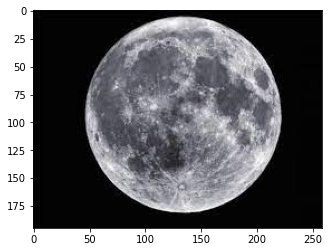

In [9]:
plt.imshow(img)

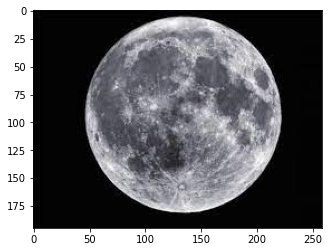

In [8]:
plt.imshow(img); 
# 뒤에 ; 붙이면 output<matplotlib.image.AxesImage at 0x1d834979430> 안 나옴
#output 안보고 이미지만 보겠다

tick 삭제 방법 
1. xticks([])/yticks([])
2. xticks(ticks=None)/ yticks(ticks=None)
3. plt.axis('off')

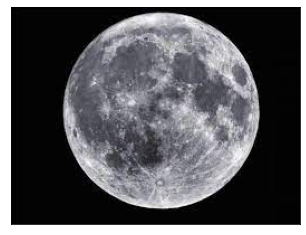

In [10]:
plt.imshow(img); #array에서 이미지로 출력
plt.xticks([]);
plt.yticks([]);

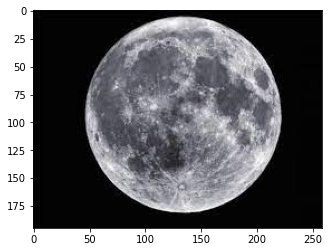

In [11]:
plt.imshow(img); #array에서 이미지로 출력
plt.xticks(ticks=None); #키워드 방식이므로 생략하면 안 됨

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

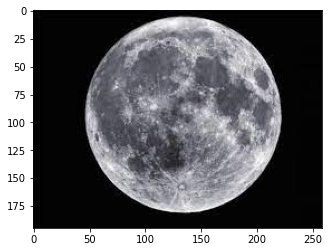

In [12]:
plt.imshow(img); #array에서 이미지로 출력
plt.xticks(None) #키워드 방식 생략하면 다르게 나옴

#### pyplot.matshow 
imshow 처럼 이미지 보여줌
- `plt.matshow(A, fignum=None, **kwargs)`
- matshow 는 array를  *matrix 형태*로 보여줌
- origin (0,0) 은 좌측 최상단

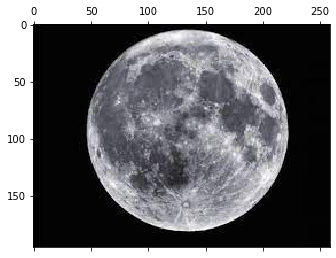

In [13]:
plt.matshow(img)

(-0.5, 258.5, 194.5, -0.5)

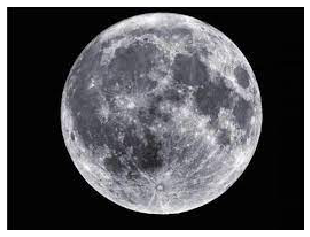

In [15]:
tmp=plt.imread('moon.jpg') # 이미지를 ndarray로 가져옴
plt.matshow(tmp);
plt.axis('off')

### 1.2 imageio
- scipy ndimage 대체할 새롭게 만든 이미지 입출력 도구
-  matpotlib 에서는 다양한 파일 포맷을 못불러오는 경우가 있어서 imageio를 써서 불러오면 불러와짐
- np의 ndarray를 상속 받아서 image의 효율적인 구조로 재정의한 클래스
- 이미지 효율적인,자주 부르는

array 아닌 Array 로 나옴

In [5]:
from imageio import imread #image input output

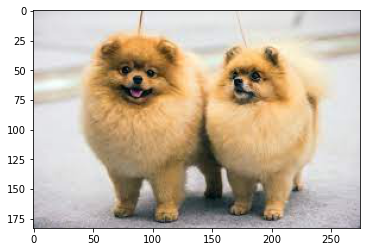

In [6]:
img2= imread('dog.jpg')
plt.imshow(img2);

In [23]:
img2

Array([[[203, 202, 207],
        [203, 202, 207],
        [204, 203, 208],
        ...,
        [200, 199, 205],
        [200, 199, 205],
        [200, 199, 205]],

       [[203, 202, 207],
        [204, 203, 208],
        [205, 204, 209],
        ...,
        [201, 200, 206],
        [201, 200, 206],
        [201, 200, 206]],

       [[205, 204, 209],
        [205, 204, 209],
        [206, 205, 210],
        ...,
        [201, 200, 206],
        [201, 200, 206],
        [201, 200, 206]],

       ...,

       [[114, 117, 126],
        [118, 121, 130],
        [135, 138, 147],
        ...,
        [176, 176, 188],
        [167, 167, 179],
        [162, 162, 174]],

       [[106, 109, 118],
        [118, 121, 130],
        [131, 134, 143],
        ...,
        [155, 154, 168],
        [138, 137, 151],
        [125, 124, 138]],

       [[117, 120, 129],
        [133, 136, 145],
        [132, 135, 144],
        ...,
        [160, 159, 173],
        [130, 129, 143],
        [103, 102, 116]]

In [21]:
type(img2) # ndarray 가 아님
#array 아니고 Array 다

imageio.core.util.Array

In [19]:
issubclass(type(img2),np.ndarray) 
# ndarray 상속받아서 효율적으로 처리하도록 만들었다.

True

In [20]:
dir(img2) #__array_*__  numpy와 호환

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__r

#### \_\_array_interface__
- 구성 
- 상속 받아서 numpy형태로 불러왔기 때문에 numpy에 썼던거 그대로 씀

`__array_interface__`             
어떻게 만들어졌는지 알고 싶으면 이걸 확인하면 됨

In [36]:
img2.__array_interface__  
#하단과 같은 형식으로 interface 생성됨

{'data': (2028091242672, False),
 'strides': None,
 'descr': [('', '|u1')],
 'typestr': '|u1',
 'shape': (651, 500, 3),
 'version': 3}

### skimage
array
- imread
- imshow

In [7]:
from  skimage import io

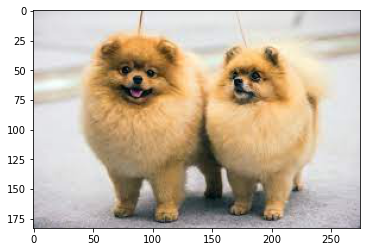

In [8]:
img3= io.imread('dog.jpg')
plt.imshow(img3);

In [29]:
img

array([[[65, 65, 65],
        [29, 29, 29],
        [32, 32, 32],
        ...,
        [38, 38, 38],
        [38, 38, 38],
        [38, 38, 38]],

       [[33, 33, 33],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[34, 34, 34],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[35, 35, 35],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[35, 35, 35],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]],

       [[35, 35, 35],
        [ 0,  0,  0],
        [ 2,  2,  2],
        ...,
        [ 2,  2,  2],
        [ 2,  2,  2],
        [ 2,  2,  2]]], dtype=uint8)

In [28]:
type(img3) # ndarray 

numpy.ndarray

#### array_equal
- 불러온 이미지의 array의 형태와 원소가 동일한지를 True/False로 반환

matplotlib(ndarray) , skimage(ndarray) ,  imageio (Array) 이지만 내부 값은 동일      
데이터 타입은 달랐지만 안에 값은 같구나           

-위에서 뭐 상솓받았다 했는데 실제 값은 똑같은데 부가기능만 추가된 것

In [24]:
np.array_equal(img,img3) #동일한 array

True

In [25]:
np.array_equal(img2,img3)

True

## 데이터 전처리

In [9]:
import tensorflow as tf
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()
X_train.shape #shape , dtype 일치시켜야함

(60000, 28, 28)

matrix 연산은 아주 복잡, 리소스 많이 차지해 속도에 문제 생김



ML의 학습 데이터는 이미지의 크기(사이즈)가 동일해야함      
사이즈가 다르면 맞춰주는 것이 가장 기본 전처리
- missing data 있으면 안됨
- 사이즈 동일하게 맞추기위해서 crop, resize 해주는게 가장 기본적인 전처리
=> 빠르고 쉽고 편해서 numpy 기반으로 기본적으로 함


In [30]:
img.shape #크기(651, 500, 3)-> resizing, crop 으로 크기 동일하게 맞춤

(195, 259, 3)

## 2.데이터 크기 맞추기

- Numpy
    - 이미지 크기 자르기 : slicing, resize
- skimage
    - 이미지 크기 자르기 : crop(특정 영역을 버리는 것과 같음)

1. slicing
2. bool indexing
3. fancy indexing

In [10]:
import numpy as np

#### indexing

1행 2열 값 8

In [35]:
a=np.arange(24).reshape(4,6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [39]:
a.shape

(4, 6)

In [40]:
a.size

24

In [36]:
a[1,2] #comma indexing

8

### 2.1 slicing

1행 전체
- 전체 `:` , `...`로 표기 
- 시작 index : 끝 index+1
    - 뒤 index는 포함 안하나봐


In [37]:
a[1,:]

array([ 6,  7,  8,  9, 10, 11])

In [62]:
a[1,...] # : = ... 과 동일함

array([ 6,  7,  8,  9, 10, 11])

1-2 행,2열 인 8,14 

In [63]:
a[1:3,2:3]

array([[ 8],
       [14]])

In [64]:
a[(1,2),(2,2)] 

array([ 8, 14])

### boolean indexing

조건에 맞는값True 안 맞으면 False

In [34]:
a>7 

array([[False, False, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True]])

In [38]:
a[a>3]

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23])

7보다 크고 9보다 작은 값 

In [35]:
a[(a>7)&(a<9)] #boolean indexing

array([8])

### fancy indexing
- `[[ ]]`


In [36]:
a[[1,3,1]] #fancy indexing
#1행, 3행, 1행 차례대로 가져옴

array([[ 6,  7,  8,  9, 10, 11],
       [18, 19, 20, 21, 22, 23],
       [ 6,  7,  8,  9, 10, 11]])

1 행의 1열,3열,1열에 있는 값 7,9

In [65]:
a[1,[1,3,1]] 

array([7, 9, 7])

### Image Slicing
- pixel  단위를 정해서 가져옴

In [52]:
img.shape

(470, 728, 3)

x축 0 ~ 300까지, y축 0 ~ 500 까지, 채널은 전체 가져옴  

In [53]:
sliced_img=img[:300,:500,3]
# 맨 마지막 3은 에러나고 , :3은 되네 뭐 당연한거지만

IndexError: index 3 is out of bounds for axis 2 with size 3

In [58]:
sliced_img=img[:300,:500,:]

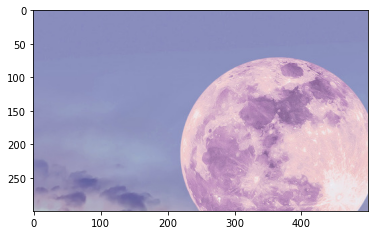

In [59]:
plt.imshow(sliced_img)

- 이미지 하나하나가 pixel
- crop은 픽셀중 해당 element 까지 잘라서함
- 이미지 모든 채널의 크기가 동일해야되서 채널을 따로 관리할 필요가 없음

채널  : 색상표현하는 방식 
- 3가지
    - RGB, BGR
- 4가지
    - CYMK

`:,:` , `...` 동일

- 0 이 R channel 
- 강아지 털색이 붉은색이 많은데 intensity가 가장 밝게 나옴 

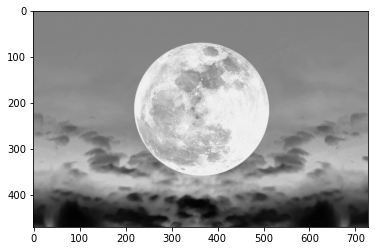

In [60]:
plt.imshow(img[...,0],cmap='gray')#red

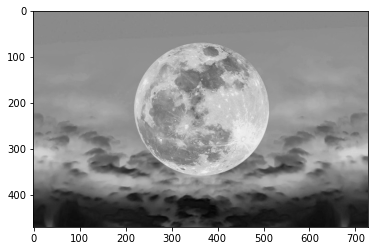

In [61]:
plt.imshow(img[:,:,1],cmap='gray') #green

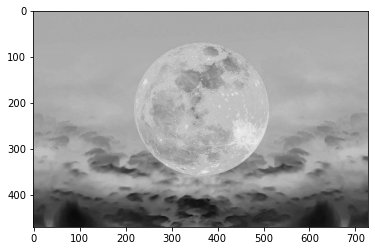

In [62]:
plt.imshow(img[:,:,2],cmap='gray') #blue

In [64]:
img4=img3[:500,:400,:] # numpy 단점 : mutable data type

In [66]:
img3[:100,:,:]=0  #0은 검정색 0~100 까지 검정색으로 바꿈 

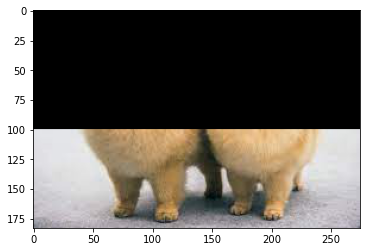

In [67]:
plt.imshow(img4) #  img3변경 했는데 img4가 변경 됨

In [45]:
img3.base is img4.base # 메모리 공유함
#numpy의 단점 mutable

True

따라서 따로 하고 싶으면 copy를 해야함

In [68]:
img4=img3[:300,:500,:].copy() #deep copy

In [69]:
img3.base is img4.base # 메모리 공유 이제 안 함

False

#### reshape 
- 형태(shape) 다르게 만든다
- 원래 이미지의 사이즈와 동일해야함

### 2.2 resize
- 갯수(size)를 다르게 만든다
- 원래 이미지의 사이즈와 상이해도 상관 없음(cropping 하는것이기 떄문에)

In [70]:
img.shape # 유추 가능한것 : 사이즈(원소 갯수) , 원소갯수, 차원 

(470, 728, 3)

In [72]:
img.ndim, img.size # 차원, 원소 갯수 1026480 = 470*728*3

(3, 1026480)

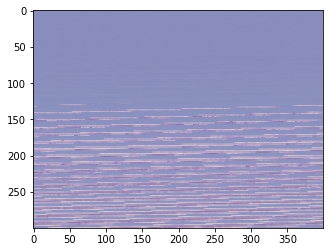

In [73]:
plt.imshow(np.resize(img,(300,400,3))) #이상하게 나옴

In [74]:
a

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [75]:
np.resize(a,(2,4)) # 차례대로 들어와서 잘랐네

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [51]:
np.resize(a,(2,3)) #순서대로 2x3 형태로 사이즈로 crop 

array([[0, 1, 2],
       [3, 4, 5]])

In [76]:
a #resize 후 원본은 그대로네, 데이터 그대로

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [52]:
 a.reshape(6,4)  #4x6에서 6x4 (사이즈 동일)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [77]:
a.reshape(2,3) # reshape error 남. shape 같아야해

ValueError: cannot reshape array of size 24 into shape (2,3)

In [78]:
a #원본 유지 

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

- 데이터를 변경한게 아님 
- function 방식
- Numpy 방식은 low-level

위의 이 방법은 너무 low level(무식한 방법이래)

저수준  numpy -> scipy -> skimage 고수준

- Numpy : python, vector 처리 하기 위한 library 로 low level

- Scipy : numpy에서는 이미지 전용 기능이 없기 때문에 numpy를 확장 시켜서 공학, 과학 분야에 많이 사용하는 library
    - scipy의 ndimage 통해서 처리하면 이미 만들어진게 많아 조금 더 편하게 할 수 있음 
- Skimage: scikit image
     - 고수준레벨에서는 미리 만들어진게 많아서 쉽게 사용 가능  


### 2.3 crop
skimage의 crop
- high-level
- `crop(ar, crop_width, copy=False, order='K')`
- copy 개념도 있음( 재할당시 유용)
- order 는 메모리 배열을 뜻함
- order를 강제시키면 C , Fortran 메모리 배열로 바꿈
    - 강제시키면 그 형태로 메모리 구조 바꿔버림
- crop_width:  `(before, after)`
    - after = 각 축별로 가장자리로부터 사라질 pixel 갯수

In [79]:
from skimage.util import crop

In [83]:
img2.shape

(183, 275, 3)

In [86]:
crop(img2, ((0,100),(0,100),(0,0))).shape
#부분 컷 할수있다

(83, 175, 3)

180 x 275 이미지에서 각 가로, 세로에 100을  제거하니 83x175 이미지로 자름

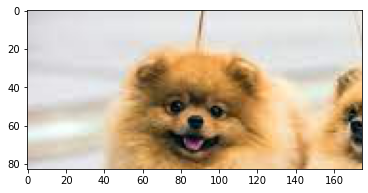

In [88]:
plt.imshow(crop(img2, ((0,100),(0,100),(0,0))))

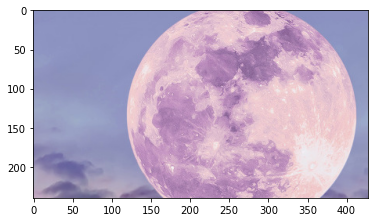

In [93]:
plt.imshow(crop(img, ((80,150),(100,200),(0,0))))
#이런 부분 컷도 가능

In [91]:
crop(img2, (150,200)) 
#crop 속성 보면 복사할지말지 그냥 막 넣기만 하면 되고
#미리 만들어 놓은 것이 많더 쉬움

array([], shape=(16, 0, 0), dtype=uint8)

--- 
- numpy 의 단점은 mutable 형태이기 떄문에 메모리를 공유하여 **같이 변함**

#### base
- 메모리를 공유하는지 확인
- mutable  형태는 view를 만들어서 메모리를 공유하는 현상이 생김
- 자신의 메모리를 갖는 경우 array base=None

In [94]:
a = b = np.arange(6).reshape(2,3) #mutable

In [95]:
a.base

array([0, 1, 2, 3, 4, 5])

In [96]:
b.base

array([0, 1, 2, 3, 4, 5])

In [73]:
b[0]=100
b.base  #b[0] 변경

array([100, 100, 100,   3,   4,   5])

In [74]:
a.base #데이터를 공유하기 때문에 a 도 변경됨

array([100, 100, 100,   3,   4,   5])

### copy
- 새로운 메모리 공간에 할당하여 메모리 공유를 안 함
- 2차 이상은 deepcopy를 사용해야하는데....
- numpy에서는 deep copy
    - 기본적으로 2차원 이상을쓰기 때문에 *copy가 deepcopy*
        - shallow : `view`
            -  어느 과정까지는 메모리 공유하여 변경해야할 때 사용 
        - deep :`copy`
            - 메모리 공유하지 않음
-   tensor 에서는 없어짐    
[Numpy Reference Quickstart tutorial view or shallow copy](https://numpy.org/doc/stable/user/quickstart.html#view-or-shallow-copy)

In [97]:
a=np.arange(6).reshape(2,3)
b=a.copy()

In [98]:
a.base, b.base  #공유하지 않으므로 b는 None

(array([0, 1, 2, 3, 4, 5]), None)

In [83]:
b[0]=100
b #b 만 변경

array([[100, 100, 100],
       [  3,   4,   5]])

In [84]:
a #변경 없음

array([[0, 1, 2],
       [3, 4, 5]])

 - python 에서는 shallow copy가 됨
    - 2차원 이상은 deep 해서 copy가 안됨
        - shallow: `copy`
        - deep: `copy.deepcopy`
        
        
원래 값이 안나오는 경우          
deep(2차이상)경우 copy는 불가 1차까지만 가능하고          
이럴때 사용하는 것이 deepcopy              

In [85]:
#python-1차원 list   copy
b = a = [1,2,3] #list 는 mutable
c = b.copy() # copy

b[0]=100

a,b,c #a가 b 따라서 변경되고 copy한 c는 새로운 메모리공간에 만들어 변경 안 됨

([100, 2, 3], [100, 2, 3], [1, 2, 3])

In [86]:
#python- 2차원 list   copy
x = [[1,2],[3,4]] # 2차원 이상은 deep 
y = x.copy()

x[0][0]=10000

x, y  #변경 됨 -> copy 는 python에서는 shallow copy

([[10000, 2], [3, 4]], [[10000, 2], [3, 4]])

In [177]:
import copy

In [178]:
#python- 2차원 list   deepcopy
x=[[1,2],[3,4]] # 2차원 이상은 deep 해서 deep copy 써야함
y=copy.deepcopy(x)
x[0][0]=10000
y  #변경 안됨

[[1, 2], [3, 4]]


**영상 처리의 목표 2가지**
1. ML/DL의 데이터셋에 대한 전처리
2. ML/DL을 사용하지 않는 영상처리
    - 데이터셋 구조 (n,h,w,c)
    - 동일한 데이터 크기,타입
    - 데이터 형태 2차원  
- ML data 기본은 2차원 
 
<br> 
 
1. 데이터 확보
     -  정형데이터: pandas로 바꿈 
     - 비정형데이터 : 모델 따라서 학습 데이터의 형태 바뀜
         - CNN 할때 최소 데이터가 input_shape이 3차원이여야함(hwn을 말하는건가)
        -  mnist는 흑백이미지라서 2차원인데 학습가능한 형태로 데이터 변경해야함
    - 실제 데이터를 학습용 데이터로 바꿔야한다.(학습시킬 수 있는 형태로 바꿔야 함) 
    - 모든 데이터의 h,w 맞추기 (ML관점)
    - 데이터 set 구성을 위한 전처리의 일부다. **학습 데이터 set 구축**
    
<br><br>
    
- **데이터 셋 구성을 위한 전처리**에서는 모든 데이터의 형태를 맞춰야함
- hw는 2차원은 직사각형 형태를 맞추기 위해서 전처리
- 모든 ml은 2차원 관점 -> nhw 는 n개의 hxw 이미지
    - 학습 :loss function 을 최소화
    - dense layer는 기본적으로 1차원 데이터를 받음
    - CNN(Convolution Neural Network)은 convolution 은 2차원의 특성을 뽑기 때문에 2차원 이미지가 들어감    

        
<br>

crop , resize : 데이터 크기 맞추기         
stack,concat : 데이터 합치기

<br>
        
- 이미지 하나 불러와서 numpy 형태로 한개씩 여러개를 불러와서 학습 데이터 셋으로 만듦    



### mnist 
- 우편에서 얻은 0~9 숫자의 손글씨 이미지를 스캔하여 28x28 사이즈로 전처리, 데이터셋 구성 
- 예시 데이터는 모두 numpy, tesnfor 로 되어 있음 

In [11]:
# hold-out :split, stack 같이 알아야함
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [12]:
X_train.shape #60,000개의 28x28 이미지 nhw 포맷

(60000, 28, 28)

In [13]:
X_train_= X_train.reshape(-1,28,28,1)  
X_train_.shape   #nhwc 포맷
# 28X28 6만개, 2차원 관점에서

(60000, 28, 28, 1)

- 기본적인 ml 데이터는 2차원
- 이미지도 2차원(h w)
- missing 데이터 없어야함 

In [14]:
import seaborn as sns

In [15]:
iris= sns.load_dataset('iris') #2차원
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


- **데이터 셋 구성을 위한 전처리**에서는 모든 데이터의 형태를 맞춰야함
- hw는 2차원은 직사각형 형태를 맞추기 위해서 전처리
- 모든 ml은 2차원 관점 -> nhw 는 n개의 hxw 이미지
    - 학습 :loss function 을 최소화
    - dense layer는 기본적으로 1차원 데이터를 받음
    - CNN(Convolution Neural Network)은 convolution 은 2차원의 특성을 뽑기 때문에 2차원 이미지가 들어감



## 3.데이터 합치기
 - 데이터 하나하나 불러와서 합쳐서 *학습데이터셋* 구축 
 
### 결합 기준
- 행(row)기준 결합   : 데이터 추가
    - `concatnate(axis=0)`
    - `vstack`
    - `r_`
    - `row_stack`
    
- 열(column)기준 결합 : data - target 결합
    - `concatnate(axis=1)`
    - `hstack`
    - `c_`
    - `column_stack`

In [183]:
img

array([[[ 63,  46,  39],
        [ 61,  44,  37],
        [ 57,  40,  33],
        ...,
        [ 54,  46,  44],
        [ 54,  46,  44],
        [ 54,  46,  44]],

       [[ 63,  46,  39],
        [ 60,  43,  36],
        [ 57,  40,  33],
        ...,
        [ 54,  46,  44],
        [ 54,  46,  44],
        [ 54,  46,  44]],

       [[ 60,  43,  36],
        [ 55,  38,  31],
        [ 54,  37,  30],
        ...,
        [ 51,  43,  41],
        [ 52,  44,  42],
        [ 53,  45,  43]],

       ...,

       [[109,  92,  98],
        [101,  84,  90],
        [113,  96, 102],
        ...,
        [123, 107, 108],
        [125, 109, 110],
        [124, 108, 109]],

       [[112,  95, 101],
        [105,  88,  94],
        [116,  99, 105],
        ...,
        [117, 101, 102],
        [115,  99, 100],
        [115,  99, 100]],

       [[114,  97, 103],
        [107,  90,  96],
        [118, 101, 107],
        ...,
        [108,  92,  93],
        [105,  89,  90],
        [104,  88,  89]]

In [16]:
testing= img.copy() #일단 크기 다 맞췄다 생각하고

In [17]:
testing2=img.copy()

In [18]:
#이제 2차원 데이터 형태로 데이터 구축
testing.shape      
#3차원이지만 데이터 셋 관점에서는 NHWC형태인 (1,470, 728, 3)
# (470, 728, 3) 짜리 한 개 있는 것

(470, 728, 3)

In [ ]:
(2,470, 728, 3)
#testing,testing2 2개로 data set 만들면 이렇게

In [45]:
a=np.arange(12).reshape(3,4)
b=a.copy()

In [21]:
a,b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

### 3.1 concatenate
- `concatenate( (a1,a2,...), axis=0, out=None )`
- 2차원인 경우
    - axis=0 행(row)기반 결합
        - data 추가시킬 때 row 기반 concatenate 사용
    - axis=1 열(column) 기준 결합
        - 1일땐 data와 target을 붙일 때 사용
- depth 형태로 붙이는게 아님(겹쳐서 불가)
    - 단 2이상 deep 형태(겹쳐서 붙이기)로는 안붙인다.

In [23]:
np.concatenate((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [191]:
np.concatenate((a,b),axis=0) #행(row)기준-> 데이터 추가

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [192]:
np.concatenate((a,b),axis=1) #열(col)기준 -> train - target

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

numpy의 단점  중복되는 것이 너무 많아

### stack
- vstack : `vstack((a,b,...))`
    - r_ : `r_[a,b,...]`
    - row_stack : `row_stack(a,b,...)`
    - concatnate(axis=0)
- hstack
    - c_
    - column_stack
    - concatnate(axis=1)

- stack 
    - 새로운 axis를 기준으로 결합 ( new axis ,h,w)
        - matrix 기반으로 결합됨

중복되는게 많음

In [193]:
np.vstack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [195]:
np.r_[a,b] #indexer(단축 표현)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [199]:
np.row_stack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [194]:
np.hstack((a,b))

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [196]:
np.c_[a,b]

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [197]:
np.column_stack((a,b))

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

- 데이터 구성할때 다양한 경우가 있어 많은 기능을 제공함

### stack
- 새로운 axis를 기준으로 결합 ( new axis ,h,w)
    - matrix 기반으로 결합됨

In [46]:
a.shape

(3, 4)

In [201]:
np.stack((a,b)) #공백! 우리가 아는 형태
#3,4 가 2 개

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]])

In [202]:
np.stack((a,b)).shape  #3x4형태의 matrix 가 2개 -> nhw format

(2, 3, 4)

In [203]:
np.stack((testing, testing2))

array([[[[ 63,  46,  39],
         [ 61,  44,  37],
         [ 57,  40,  33],
         ...,
         [ 54,  46,  44],
         [ 54,  46,  44],
         [ 54,  46,  44]],

        [[ 63,  46,  39],
         [ 60,  43,  36],
         [ 57,  40,  33],
         ...,
         [ 54,  46,  44],
         [ 54,  46,  44],
         [ 54,  46,  44]],

        [[ 60,  43,  36],
         [ 55,  38,  31],
         [ 54,  37,  30],
         ...,
         [ 51,  43,  41],
         [ 52,  44,  42],
         [ 53,  45,  43]],

        ...,

        [[109,  92,  98],
         [101,  84,  90],
         [113,  96, 102],
         ...,
         [123, 107, 108],
         [125, 109, 110],
         [124, 108, 109]],

        [[112,  95, 101],
         [105,  88,  94],
         [116,  99, 105],
         ...,
         [117, 101, 102],
         [115,  99, 100],
         [115,  99, 100]],

        [[114,  97, 103],
         [107,  90,  96],
         [118, 101, 107],
         ...,
         [108,  92,  93],
        

### dstack
- 각 각을 새로운 차원으로 붙여줌  ( h,w, new axis )
    - n 이 shape에서 뒤에 추가된다.

In [ ]:
a.shape

In [25]:
a,b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]))

In [204]:
np.dstack((a,b))  #3차원 

array([[[ 0,  0],
        [ 1,  1],
        [ 2,  2],
        [ 3,  3]],

       [[ 4,  4],
        [ 5,  5],
        [ 6,  6],
        [ 7,  7]],

       [[ 8,  8],
        [ 9,  9],
        [10, 10],
        [11, 11]]])

In [206]:
np.dstack((a,b)).shape  #마지막에 (  ,2)

(3, 4, 2)

## Dataset
- 실무에 영상처리에 적용해야하므로 실제 이미지 데이터를 다양한 방법중 어떻게 해야하는지
1. Numpy 이용해서 만드는 방법
    - numpy,scipy, scikitimage, pil 은 덜 중요 
    - ML/DL 사용
        -  머신러닝,딥러닝 사용할때 나눠서 기법들이 언제 써야하는지 결정
        - 딥러닝 특징은 내부에서 feature extraction 을 kernel통해서 학습
        - CNN 은 kernel통해서 학습
            - CNN: convolution layer 가 2차원의 데이터 특성을 뽑아서 퍼셉트론과 연결
            - ANN : 1차원 데이터를 받는 퍼셉트론으로 구성
        - 영상이미지 처리를 모델단에서 하는경우 많아서 학습데이터만 잘 구축하고 모델 구축을 하면 모델기반으로 가능
          
<br>

- 딥러닝은 데이터가 적으면 과적합(overfit) 현상 일어남 
   - 머신러닝으로 해결 
       - 데이터 구축할때 특징을 변화시켜야 해서 영상처리 기법은 ml에서 더 많이씀
- 아직까지 머신러닝,딥러닝 사용하지 않는 close form 알고리즘 이용하는게 활용범위가 높음
    - 데이터 많은 경우 데이터셋만 구축하면됨
            - 이미지 데이터가 적은 경우 augmentation 할수 있긴하나 성능은 무변, 과적합 방지용이기 때문


 Imagenet 에서 Alexanet이 우승해서 딥러닝에 관심 갖게 됨
- class가 1000개를 수집,전처리하여 데이터셋 구축하기 위해서 5년 걸림

In [ ]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()
#hold-out
# 이런 형태의 data set 만드는 것이 첫번째

1. 전처리
2. 데이터셋 구축
    - 여러개의 데이터를 동시에 받아서 데이터 셋 구축할 수 있다.


- 문제점: 1개 이미지 불러서 -> numpy 로 변환하는 작업을 반복
    - 한 개 이미지 불러서 -> numpy로 변환
    - 이걸 계속 data set에 붙여

- 하나의 데이터 셋으로 구성
    - 이미지 형식 맞추기
        - 조건: 데이터 형태(shape), 타입(dtype) 동일 해야함
        - 데이터 누락된 곳 없는지 보고
        - NHWC, NCHW format 
            - N 이미지 갯수, 세로(heigths), 가로(Width) , 채널(Channel)


<br>
NHWC or NCHW : 2차원으로 이해하기 HWC가 N개        
<br>        
        
크기 맞추기
- 이미지를 공통적인 부분만 남기고 자르게 되면 중요한 부분이 잘릴수도 있어서 가장 큰 범위에 맞추어서 자름
- mnist 도 전체데이터 쪼개서 가장 공통적인것 중에서 가장 작은 데이터셋으로 만듦.

In [26]:
import numpy as np

In [47]:
 #크기가 다름 -> 학습데이터 세트 구축 X
a=np.arange(28*28).reshape(28*4,7)
b=np.arange(28*28).reshape(28*7,4)

In [48]:
#크기가 동일 -> 학습데이터 세트 구축 O
a=np.arange(28*28).reshape(28,28) 
b=np.arange(28*28).reshape(28,28)

In [49]:
a=a.reshape(28,28,1)  
b=b.reshape(28,28,1)

In [34]:
b

array([[[  0],
        [  1],
        [  2],
        [  3],
        [  4],
        [  5],
        [  6],
        [  7],
        [  8],
        [  9],
        [ 10],
        [ 11],
        [ 12],
        [ 13],
        [ 14],
        [ 15],
        [ 16],
        [ 17],
        [ 18],
        [ 19],
        [ 20],
        [ 21],
        [ 22],
        [ 23],
        [ 24],
        [ 25],
        [ 26],
        [ 27]],

       [[ 28],
        [ 29],
        [ 30],
        [ 31],
        [ 32],
        [ 33],
        [ 34],
        [ 35],
        [ 36],
        [ 37],
        [ 38],
        [ 39],
        [ 40],
        [ 41],
        [ 42],
        [ 43],
        [ 44],
        [ 45],
        [ 46],
        [ 47],
        [ 48],
        [ 49],
        [ 50],
        [ 51],
        [ 52],
        [ 53],
        [ 54],
        [ 55]],

       [[ 56],
        [ 57],
        [ 58],
        [ 59],
        [ 60],
        [ 61],
        [ 62],
        [ 63],
        [ 64],
        [ 65],
      

In [30]:
b.shape  #HWC format 28x28크기의 이미지 채널 1개

(28, 28, 1)

In [31]:
np.stack((a,b)).shape # 우리가 아는 NHWC format

(2, 28, 28, 1)

In [32]:
np.stack((a,b))   #데이터 셋 구성 

array([[[[  0],
         [  1],
         [  2],
         ...,
         [ 25],
         [ 26],
         [ 27]],

        [[ 28],
         [ 29],
         [ 30],
         ...,
         [ 53],
         [ 54],
         [ 55]],

        [[ 56],
         [ 57],
         [ 58],
         ...,
         [ 81],
         [ 82],
         [ 83]],

        ...,

        [[700],
         [701],
         [702],
         ...,
         [725],
         [726],
         [727]],

        [[728],
         [729],
         [730],
         ...,
         [753],
         [754],
         [755]],

        [[756],
         [757],
         [758],
         ...,
         [781],
         [782],
         [783]]],


       [[[  0],
         [  1],
         [  2],
         ...,
         [ 25],
         [ 26],
         [ 27]],

        [[ 28],
         [ 29],
         [ 30],
         ...,
         [ 53],
         [ 54],
         [ 55]],

        [[ 56],
         [ 57],
         [ 58],
         ...,
         [ 81],
         [

하나의 데이터셋으로 만들어  관리

In [35]:
from sklearn.datasets import load_iris
data=load_iris()

In [53]:
data.data.shape

(150, 4)

In [36]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
data.target    #  (150,)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [51]:
data.target .shape

(150,)

In [38]:
target=data.target.reshape(-1,1) #차원 증가 (150,1)

In [52]:
target.shape

(150, 1)

데이터를 붙이는 이유
1. 붙인 이유 train, test 로 나누어서 학습
2. EDA(탐색적 데이터 분석) 

In [39]:
np.hstack((data.data,target ))   #차원을 동일하게 맞추어서 테이블로 붙임 ,옆으로 붙인건가

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

Next...
- skimage, pil 이용해서 DL 사용하지 않을때 특징을 뽑는 다양한 방법들을 다룰 예정 
- 성능 향상을 위한 기본 영상처리 기법 